# Mushroom Classification

Amulya Tamma 

4/7/2024

### Abstract
The purpose of this project is to understand the relationships between the different characteristics of mushrooms and see if those attributes can be used to create a model that can guess whether or not a mushroom is edible or poisonous with high accuracy. Various methods are going to be used to match relationships between key features and the class (edible vs poisonous).

The learning model is classification: a supervised learning technique where the algorithm learns from labeled data to predict the category or class of new observations. This is used when the output variable is categorical (edible versus poisonous), and its goal is to map from input features to discrete class labels. The data is labeled (edible or poisonous) and will be used to train a classification model that can predict the label (class) of new mushrooms based on their attributes, including cap shape, cap color, gill attachment, etc. The model will then learn the patterns in the data and make predictions about the edibility of mushrooms based on these characteristics. 

The algorithms that are going to be used below are Logistic Regression and Support Vector Machines (using differerent kernels). The accuracy will be calculated for all of these algorithms and then compared with each other in order to determine the best model. 

Here are the following characteristics that are included within the dataset: 
###### Class
Indicates mushroom edibility (poisonous=p, edible=e), binary classification 
###### Diameter 
Diameter of the mushroom cap in cm 
###### Cap Shape
Shape of the mushroom cap (bell= b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o)
###### Cap Surface
Texture of the mushroom cap surface, where: fibrous (i) grooves (g) scaly (y) smooth (s) shiny (h) leathery (l) silky (k) sticky (t) wrinkled (w) fleshy (e)
###### Cap Color
The color of the mushroom cap, with various options such as brown, buff, gray, green, pink, purple, red, white, yellow, blue, orange, and black (nominal).
###### Does Bruise or Bleed
Indicates whether the mushroom bruises or bleeds when injured (nominal), true or false 
###### Gill Attachment
How gills are attached to the stem, where: adnate (a) adnexed (x) decurrent (d) free (e) sinuate (s) pores (p) none (f) unknown (?)
###### Gill Spacing
Spacing between gills, where: close (c) distant (d) none (f)
###### Gill Color 
Color of the gills, where: see cap-color (and none=f)
###### Stem Height
Height of the mushroom stem in cm (metrical).
###### Stem Width: 
Width of the mushroom stem in mm (metrical). 
###### Stem Root: 
Structure of the stem's root, where: bulbous (b) swollen (s) club (c) cup (u) equal (e) rhizomorphs (z) rooted (r)
###### Stem Surface: 
Texture of the mushroom stem surface, where: see cap-surface (and none=f), true false 
###### Stem Color: 
Color of the mushroom stem, where: see cap-color (and none=f)
###### Veil Type: 
Type of veil covering the gills, where: partial (p) universal (u)
###### Veil Color: 
Color of the veil, where: see cap-color (and none=f)
###### Has Ring: 
Presence of a ring on the mushroom, where: ring (t) none (f)
###### Ring Type: 
Type of ring present, where: cobwebby (c) evanescent (e) flaring (r) grooved (g) large (l) pendant (p) sheathing (s) zone (z) scaly (y) movable (m) none (f) unknown (?)
###### Spore Print Color: 
Color of the mushroom spore print, where: see cap-color
###### Habitat: 
Environment where the mushroom is found, where: grasses (g) leaves (l) meadows (m) paths (p) heaths (h) urban (u) waste (w) woods (d)
###### Season: 
Season when the mushroom is commonly observed, where: spring (s) summer (u) autumn (a) winter (w)

Source of Dataset Used: https://www.kaggle.com/datasets/vishalpnaik/mushroom-classification-edible-or-poisonous/data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
mush= pd.read_csv('mushroom.csv')
mush

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [3]:
# summary of the information within mushroom
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In order to narrow the dataset down, NaN values from specific rows were removed. Other NaN rows were not removed in order to preserve the dataset (removing all NaN values would eliminate the entire dataset). The final size of the dataset came to be 3883 data points. Gil spacing, gil attachment, and stem root were dropped in order to narrow down the dataset. 

In [4]:
#dropping duplicates
mush.drop_duplicates()
#removing observations that don't have the target variable
mush.dropna(subset=['class'])
#removing observations that don't have the cap-surface variable 
mush.dropna(subset=['cap-surface'])
#dropping missing values & narrowing down the dataset to 3000 values
mushs= mush.dropna(subset=['gill-spacing', 'gill-attachment', 'stem-root'])
mushs

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
5295,e,9.29,f,NaN,g,f,s,c,p,6.93,...,b,NaN,u,NaN,NaN,f,f,NaN,d,w
5296,e,6.78,x,NaN,g,f,s,c,p,5.70,...,b,NaN,u,NaN,NaN,f,f,NaN,g,a
5297,e,8.07,x,NaN,g,f,s,c,p,7.53,...,b,NaN,u,NaN,NaN,f,f,NaN,d,a
5298,e,9.30,f,NaN,g,f,s,c,p,6.87,...,b,NaN,u,NaN,NaN,f,f,NaN,d,a
5299,e,9.62,x,NaN,g,f,s,c,g,8.81,...,b,NaN,u,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58240,p,2.54,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58241,p,3.13,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,w
58242,p,2.83,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58243,p,3.83,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,s


### Logistic Regression

Logistic Regression is suitable for binary classification tasks, where the target variable (class) has only two possible outcomes. Because the class feature here only has two outcomes (edible versus poisonous), it is perfect to use logistic regression. Logistic regression assumes that the mushroom observations are independent from each other and do not depend on other observations. 

Attributes that can be used for logistic regression include cap diameter, cap shape, cap surface, cap color, does bruise or bleed, gill attachment, gill spacing, gill color, stem height, and other features. 

The column "class" in our dataset includes data about whether or not the mushroom can be eaten. If the mushroom is designated as an 'e', it is edible. If the mushroom is designated as a 'p', it is poisonous. 

#### One-hot Encoding 
Because the 'class' column is a categorical variable, this value must be converted into a numerical format that can be used for logistic regresion. In the mushroom dataset, many of the variables can be one-hot encoded to transform the categorial variables into binary vectors that represent the presence or absense of each category. 

Here, we one-hot encode poisonous as represented as 1 and edible represented as 0. 

In [5]:
print("Unique values before mapping:", mushs['class'].unique())
mushs.loc[:,'class'] = mushs['class'].apply(lambda x: 1 if x == 'p' else 0)
#ensuring encoding happened correctly
print("Unique values after mapping:", mushs['class'].unique())
mushs

Unique values before mapping: ['e' 'p']
Unique values after mapping: [0 1]


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
5295,0,9.29,f,NaN,g,f,s,c,p,6.93,...,b,NaN,u,NaN,NaN,f,f,NaN,d,w
5296,0,6.78,x,NaN,g,f,s,c,p,5.70,...,b,NaN,u,NaN,NaN,f,f,NaN,g,a
5297,0,8.07,x,NaN,g,f,s,c,p,7.53,...,b,NaN,u,NaN,NaN,f,f,NaN,d,a
5298,0,9.30,f,NaN,g,f,s,c,p,6.87,...,b,NaN,u,NaN,NaN,f,f,NaN,d,a
5299,0,9.62,x,NaN,g,f,s,c,g,8.81,...,b,NaN,u,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58240,1,2.54,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58241,1,3.13,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,w
58242,1,2.83,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58243,1,3.83,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,s


#### Preparing the Data Set

The features for this dataset will be cap diameter, stem height, and stem width. 
The data will be split into 80% training data and 20% test data. 

The data will also be randomized within the splitting to ensure that points are randomly distributed across the training and testing sets, reducing the risk of introducing biases or patterns into either set. If the dataset is sorted or ordered, splitting without randomization could lead to biases. Randomization also ensures the model learns patterns from a diverse and representative sample of the data, making it more likely to generalize well to unseen data and less prone to overfitting.

In [6]:
X = mushs[['cap-diameter', 'stem-height', 'stem-width']]
y = mushs[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

In [7]:
#lines for debugging
print("Unique values in y_train:", y_train['class'].unique())
print("Data type of y_train:", y_train['class'].dtype)

Unique values in y_train: [0 1]
Data type of y_train: int32


#### Logistic Regression Model 

Setting 'fit_intercept=True' in logistic regression allows the model to estimate the bias or intercept term (value of the log-odds of the variable being positive when all input features are zero). This means that the model can capture the probability of the positive class even when all input features are zero. This can also improve the overall performance of the logistic regression model by allowing it to capture the bias or tendency of the data. 

In [8]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

LRModel=LogisticRegression(fit_intercept=True)
LRModel.fit(X_train, y_train.values.ravel())
y_pred= LRModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       279
           1       0.75      0.80      0.78       498

    accuracy                           0.70       777
   macro avg       0.68      0.67      0.67       777
weighted avg       0.70      0.70      0.70       777



#### Interpretation 
Precision: The precision measures the accuracy of positive predictions by calculating the ratio of tree positive predictions to the total number of positive predictions made by the model. Higher precision indicates fewer false positives. 
- Precision for class 0 (edible mushrooms) is 0.60, meaning that 60% of the mushrooms that were predicted as edible by the model were actually edible. 
- Precision for class 1 (poisonous mushrooms) is 0.75, meaning that 75% of the mushrooms predicted as poisonous by the model were actually poisonous. 

Recall: Recall measures the model's ability to capture all positive instances by calculating the ratio of true positive predictions to the total number of actual positive instances in the data; consequently, higher recall means that there are fewer false negatives. 
- For edible mushrooms, the recall is 0.54, which means the model correctly identified 54% of all actual edible mushrooms. 
- For poisonous muchrooms, the recall is 0.80, which indicates that the model correctly identifies 80% of all actual poisonous mushrooms. 

F1-Score: F1-Score is the harmonic mean of precision and recall, providing a single metric that balance both precision and recall. 
- Given an F1-Score of 0.57, the model's ability to correctly identify edible mushrooms while minimizing false positives and false negatives is relatively low.
- The F1-score is 0.78 indicates that the model's ability to correctly identify poisonous mushrooms while minimizing false positives and negatives is much better that guessing. 

Support: The support is the number of actual occurrences of each class in the dataset; the data is relatively even. 

Accuracy: The accuracy measures the overall correctness of the model's predictions. It is calculated as the ratio of the total number of correct predictions to the total number of predictions made by the model. The overall accuracy of the model is 0.70, which means that it correctly predicted the class of 70% of all of the mushrooms in the dataset. This value is better than random guessing, but can be increased, potentially if more values are given to it.

##### Overall Model Assessment: 
The precision, recall, and F1-score for class 1 are much greater than that for class 2. This indicates that the model does much better for classifying poisonous mushrooms (class 1) than edible mushrooms (class 2). Considering the F1-score is also the harmonic mean of precision and recall, the F1-score is a metric that balances both measures. For class 1, the F1-score is pretty high, which means that there exists a good balance between precision and recall. The 70% accuracy of the model suggests that the model performs reasonable well overall, but further analysis and validation must be necessary before relying solely on the model for mushroom classification. 

While cap diameter, stem height, and stem width appear to be informative features for predicting the edibility of mushrooms, other factors should be considered with further analysis to ensure the reliability and consistency of predictions. In addition to this, a model that can better identify edible mushrooms would be preferred over this current model.

#### Graphical Representation: Receiver Operating Characteristic Curve (ROC)

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model across different threshold values. The true positive rate (sensitivity) is plotted on the y-axis and represents the percentage of actual positive cases that are correctly identified by the model. The false positive rate is plotted on the x-axis and represents the proportion of actual negative cases that are incorrectly classified as positive by the model. The area under the curve (AUC) summarizes the performance of a binary classifier across all threshold values used to convert predicted probabilities into class labels, while also quantifying the model's ability to differentiate between positive and negative instances. A value in between 0 and 1, a higher AUC value indicates better performance of the classifier in distinguishing between positive and negative instances (basically how the classifier can separate positive and negative instances, and closer to one, the better the classifier's performance at distinguishing positive and negative instances). 

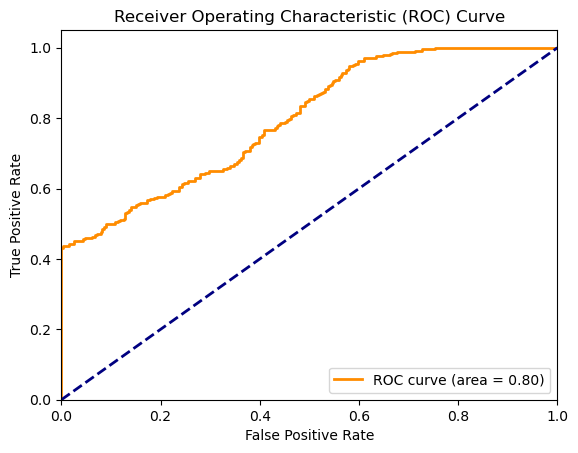

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_proba = LRModel.predict_proba(X_test)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The shape of the ROC curve gives insight into the model's performance; because this curve is towards the top-left corner of the plot, the classifier is strong. If the curve were closer to the diagonal (or the line of no-discrimination), this would have indicated that the model was much weaker. Because the AUC is 0.80, this means that the model is good at distinguishing between edible and poisonous mushrooms. 

#### Changing the Features

##### Imputation 
In order to make the model more accurate, more features can be used. All of these features are categorical, and have to be encoded into numerical values. However, there are many aspects that are not accounted for and are filled in with NaN values. If all columns with NaN values were deleted, the entire dataset would be composed of zero instances. Because of this, every missing value will be replaced with the mode of the column. This imputation can have several effects on the analysis. 

1. Preservation of Data Integirty: Imputation helps preserve the integrity of the dataset by ensuring that all required fields have values; this prevents the loss of potentially valuable infomration that would occur if rows with missing values were removed. 

2. Impact of Summary Statistics: Filling missing values with central measures/statistics can influence the overall analysis or interpretation that relies on these statistics. Here, the central measures (majority values versus minority values) aren't particularly important, but rather the subseqeunt impact on the variables. 

3. Changes in Relationships: Imputation can alter the relationships between variables. Because the missing values are being filled in, correlations, associations, and patterns observed in the data may be skewed, resulting in the changes of the classification analysis

4. Assumption Violations: The assumption is that the missing values occur at random. If this is not the case, imputation can introduce bias into the dataset, which may lead to incorrect conclusions or model performance. 

5. Overfitting: Imputation can introduce noise or artificial patterns into the data, which can lead to overfitting of predictive models. The model becomes more accustomed to noise rather than true relationships within the data. 

All of these effects are important to keep in mind while doing subsequent analysis and within the corresponding interpretation of the results. 

In [10]:
columns_to_impute =[ 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]
#avoiding copy error
mushr=mushs.copy()
#impute missing values with the mode for each column
for column in columns_to_impute:
#calculating the mode (most frequent value) for the column
    mode_value = mushr[column].mode()[0] 
#filling in missing values with the mode
    mushr[column].fillna(mode_value, inplace=True)  
#imputation verification
print(mushr.isnull().sum())

class                      0
cap-diameter               0
cap-shape                  0
cap-surface                0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment            0
gill-spacing               0
gill-color                 0
stem-height                0
stem-width                 0
stem-root                  0
stem-surface            1765
stem-color                 0
veil-type               3883
veil-color              3530
has-ring                   0
ring-type                  0
spore-print-color       3883
habitat                    0
season                     0
dtype: int64


##### Mapping

The dataset will be narrowed down to specific variables to make subsequent analysis and mapping easier. The following features will be used in the next analysis: Cap Diameter, Cap Shape, Cap Surface, Cap Color, Does Bruise or Bleed, Gill Spacing, Gill Color, Stem Height, Stem Root, Stem Color, Has Ring, Ring Type, Habitat, and Season. These are all the values that were imputated.

In [11]:
mushr = mushr[['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]]
mushr

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-spacing,stem-height,stem-root,stem-color,has-ring,ring-type,habitat,season
5295,0,9.29,f,s,g,f,c,6.93,b,u,f,f,d,w
5296,0,6.78,x,s,g,f,c,5.70,b,u,f,f,g,a
5297,0,8.07,x,s,g,f,c,7.53,b,u,f,f,d,a
5298,0,9.30,f,s,g,f,c,6.87,b,u,f,f,d,a
5299,0,9.62,x,s,g,f,c,8.81,b,u,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58240,1,2.54,o,l,g,f,f,0.00,f,f,f,f,d,u
58241,1,3.13,o,l,g,f,f,0.00,f,f,f,f,d,w
58242,1,2.83,o,l,g,f,f,0.00,f,f,f,f,d,u
58243,1,3.83,o,l,g,f,f,0.00,f,f,f,f,d,s


In [12]:
#ensuring that there are no nan values & all of the values can be mapped
nan_counts = mushr.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-spacing            0
stem-height             0
stem-root               0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [13]:
#all of the unique mapping values 
print('Cap Shape:', mushr['cap-shape'].unique())
print('Cap Surface:', mushr['cap-surface'].unique())
print('Cap Color:', mushr['cap-color'].unique())
print('DBB:', mushr['does-bruise-or-bleed'].unique())
print('Gill Spacing: ', mushr['gill-spacing'].unique())
print('Stem Root: ', mushr['stem-root'].unique())
print('Stem Color: ', mushr['stem-color'].unique())
print('Has Ring:', mushr['has-ring'].unique())
print('Habitat: ', mushr['habitat'].unique())
print('Season:', mushr['season'].unique())

Cap Shape: ['f' 'x' 's' 'o']
Cap Surface: ['s' 'e' 'd' 't' 'h' 'l']
Cap Color: ['g' 'n' 'b' 'w' 'r' 'e' 'o' 'y']
DBB: ['f' 't']
Gill Spacing:  ['c' 'd' 'f']
Stem Root:  ['b' 's' 'r' 'f']
Stem Color:  ['u' 'w' 'n' 'f']
Has Ring: ['f' 't']
Habitat:  ['d' 'g' 'l' 'h' 'm']
Season: ['w' 'a' 'u' 's']


In [14]:
#actually doing the mapping
# cap shape
cap_shape_mapping = {'b': 0, 'c': 1, 'x':2, 'f':3, 's':4, 'p':5, 'o':6}
mushr.loc[:, 'cap-shape'] = mushr['cap-shape'].map(cap_shape_mapping)

# cap surface
cap_surface_mapping= {'s': 0, 'e': 1, 'd': 2, 't': 3, 'h':4, 'l': 5}
mushr.loc[:, 'cap-surface'] = mushr['cap-surface'].map(cap_surface_mapping)

# cap color
capcolormap= {'g':0, 'n': 1, 'b': 2, 'w': 3, 'r': 4, 'e': 5, 'o':6, 'y':7}
mushr.loc[:, 'cap-color'] = mushr['cap-color'].map(capcolormap)

#does-bruise-or-bleed
dbb= {'f':0, 't':1}
mushr.loc[:, 'does-bruise-or-bleed'] = mushr['does-bruise-or-bleed'].map(dbb)

#gill spacing
gs= {'c': 0, 'd': 1, 'f': 2}
mushr.loc[:, 'gill-spacing'] = mushr['gill-spacing'].map(gs)

#stem-root
stemroot= {'b': 0, 's':1, 'r': 2, 'f': 3}
mushr.loc[:,'stem-root'] = mushr['stem-root'].map(stemroot)

#stem color
color= {'u': 0, 'w': 1, 'n': 2, 'f': 3}
mushr.loc[:, 'stem-color'] = mushr['stem-color'].map(color)

#has ring
mushr.loc[:,'has-ring'] = mushr['has-ring'].map(dbb)

#ring-type
mushr.loc[:, 'ring-type'] = mushr['ring-type'].map(dbb)

#habitat
hab= {'d': 0, 'g':1, 'l':2, 'h': 3, 'm': 4}
mushr.loc[:, 'habitat'] = mushr['habitat'].map(hab)

#season
season= {'w': 0, 'a': 1, 'u': 2, 's': 3}
mushr.loc[:, 'season'] = mushr['season'].map(season)

mushr

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-spacing,stem-height,stem-root,stem-color,has-ring,ring-type,habitat,season
5295,0,9.29,3,0,0,0,0,6.93,0,0,0,0,0,0
5296,0,6.78,2,0,0,0,0,5.70,0,0,0,0,1,1
5297,0,8.07,2,0,0,0,0,7.53,0,0,0,0,0,1
5298,0,9.30,3,0,0,0,0,6.87,0,0,0,0,0,1
5299,0,9.62,2,0,0,0,0,8.81,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58240,1,2.54,6,5,0,0,2,0.00,3,3,0,0,0,2
58241,1,3.13,6,5,0,0,2,0.00,3,3,0,0,0,0
58242,1,2.83,6,5,0,0,2,0.00,3,3,0,0,0,2
58243,1,3.83,6,5,0,0,2,0.00,3,3,0,0,0,3


#### Running Second Logistic Regression Model With New DataFrame

All of the values have been mapped and the dataframe has been narrowed down to specific columns. A new logistic model will be made with these features and the subsequent metrics of the model will be analyzed. A greater accuracy than 70% is the goal for this model. 

The number of max iterations needed to be increased, as the optimization process did not reach a stable solution in the number of default iterations. Increasing the number of iterations allows the algorithm to continue optimizing the model for a longer period, and therefore, increasing the chance of convergence and resulting in a better model.

In [16]:
X = mushr[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]]
y = mushr[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

#the actual model
LRModel2=LogisticRegression(max_iter= 1000, fit_intercept=True)
LRModel2.fit(X_train, y_train.values.ravel())
y_pred= LRModel2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       279
           1       0.98      0.99      0.98       498

    accuracy                           0.98       777
   macro avg       0.98      0.98      0.98       777
weighted avg       0.98      0.98      0.98       777



##### Interpretation 

Using this classification report, we can see that the binary classification model does much better with more features. Both the class 0 and the class 1 feature precision, recall, and f1-scores are much better; the model can now predict both classes evenly. Using the accuracy, which is the overall correctness of the model's predictions, 98% of all mushrooms in the dataset were correctly predicted. This classification report suggests that the model performs very well, with high precision, recall, and F1-score for both classes, while also having high overall accuracy. 

Some more generalized conclusions that can be drawn from this report include: 
1. Balanced Performance: The high precision, recall, and F1-score for both classes suggest that the model performs well for both edible and poisonous mushrooms, which means that the model is effective at distinguishing between the two classes. 
2. Generalization: The high accuracy of the model means that it can generalize well to data that it hasn't seen before. It may be able to capture meaningful patterns in the data rather than just memorizing the training examples (counter to overfitting). 
3. Robustness: The model is consistent across many metrics, which means that the model is probably not heavily influenced by outliers or noise in the data. 
4. Potential Improvements: While the model does incredibly well overall, there is still room for improvement, where trying different logistic regression algorithms may lead to more enhancements in performance. There are still more opportunities to refine this model and optimize it to further enhance effectiveness. 

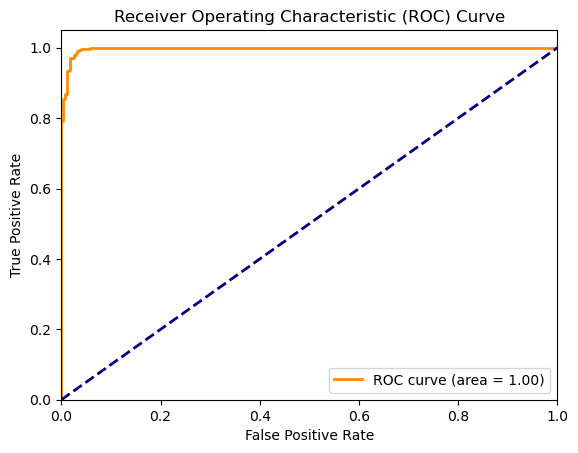

In [17]:
y_pred_proba = LRModel2.predict_proba(X_test)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

From this curve, it is obvious that the model does much better with a wider range of parameters, as the area is near 1 and the graph is situated in the top left corner. 

### Support Vector Machines


Support Vector Machines (SVM's) are supervised learning models used for classification and regression tasks. In classification, SVM's look for the optimal hyperplane that separates data into classes with the maximum margin in between. Support Vectors are the data points that are the closest to the decision boundary (aka the hyperplane) and the margin is the distance between the support vectors and the hyperplane. 

Here, this study aims to find the optimal hyperplane that best separates edible and poisonous mushrooms based on their features. Considering SVM's can handle both linearly separable and non-linearly separable databases (with the help of kernels), they will be useful for mushroom classification. The hyperplane/decision boundary will separate edible mushrooms from poisonous ones. 

Using the kernel trick, the data can be mapped into higher dimensions where the classes are more easily separable. Different kernel functions can be used to transform the mushroom features effectively, and the best kernel will be found in this study, as the choice of the kernel function can significantly impact the performance of the SVM model in classifying mushrooms. 

SVM's can handle datasets with high dimensionality and are incredibly robust against overfitting; both of these make SVM's effective in classifying mushrooms with complex decision boundaries. However, Support Vector Machines can also struggle with large datasets due to their computational complexity and selection of the optimal kernel & tuning of hyperparameters can be difficult.

#### Modeling
The first and second models used in the logistic regression models will be used again here and the models will be compared. The data will be split into 80% training data and 20% test data. 

In [24]:
from sklearn import svm 

#using Model 1 from Logistic Regression 
X = mushs[['cap-diameter', 'stem-height', 'stem-width']]
y = mushs[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

SVM_Model = svm.SVC(max_iter=1000)
SVM_Model.fit(X_train, y_train.values.ravel())
y_pred = SVM_Model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       279
           1       0.90      0.96      0.93       498

    accuracy                           0.91       777
   macro avg       0.91      0.89      0.90       777
weighted avg       0.91      0.91      0.91       777



As compared to the Logistic Regression Model 1, we can see that the SVM has already done a much better job, with an accuracy of 0.91 as compared to LR's accuracy of 0.7. This can be due to several different reasons, including: 
1. Model Complexity: SVM's can capture greater complex relationships between features and the target class compared to logistic regression. Because Support Vector Machines use a different approach to define the decision boundary between classes, the mushroom classification (which may be more complex) is more attuned to this sort of analysis. 
2. Non-linearity: If the relationships between the mushroom features and the edibility is non-linear, the SVM performs better than logistic regression. 
3. Feature Importance: The SVM weighs certain features that hav e a stronger influence on the variable much greater than other variables that have less of an influence. Specific features are leveraged more effectively than logistic regression. 

The default kernel is the RBF, or the radial basis function kernel. This is the default because the RBF kernel is incredibly versatile and can understand complex non-linear relationships in data. It also creates decision boundaries that are nonlinear that can adapt to complex patterns in data. 

This same model will be repeated again below with a greater number of features. 

In [25]:
X = mushr[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]]
y = mushr[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

SVM_Model2 = svm.SVC(max_iter=1000)
SVM_Model2.fit(X_train, y_train.values.ravel())
y_pred = SVM_Model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       279
           1       0.98      0.99      0.99       498

    accuracy                           0.99       777
   macro avg       0.99      0.98      0.98       777
weighted avg       0.99      0.99      0.99       777



Despite the Logistic Regression Model 2 (with greater features) being incredibly accurate (98%), the SVM still found a way to optimize this value (99%) and increase the accuracy further. It is clear that the SVM model is still better than that of the logistic regression model in its account of complexities within the dataset. 

#### Experimentation with Different Kernels 

Playing with different kernels, the goal of this section is to understand the dataset better based on which kernel does the best job. Seeing the resulting accuracy can give greater insight into what major relationships exist within the dataset. 

###### Linear: 
This is suitable for linearly separable data or large datasets with many features. This works best when the data is separated by a straight line or plane in the input space. 


In [35]:
X = mushr[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]]
y = mushr[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

SVM_Model2 = svm.SVC(kernel= 'linear', max_iter=100000)
SVM_Model2.fit(X_train, y_train.values.ravel())
y_pred = SVM_Model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       279
           1       0.98      0.99      0.98       498

    accuracy                           0.98       777
   macro avg       0.98      0.98      0.98       777
weighted avg       0.98      0.98      0.98       777



The accuracy here is slightly lower than that of the RBF kernel (99%). This may indicate that the data is not linearly separable, meaning that the classes can't be separated by straight line. This means that the data itself is incredibly complex, and the resolution that the linear kernel achieves is not great enough for the mushroom features to do an accurate comparison of the values (although it gets close). It is also good to note that the RBF kernel is more prone to overfitting compared to the linear kernel, especially when the dataset is noisy or small. 

###### Polynomial: 
This is best used when the decision boundary is nonlinear but still can be approximated by a polynomial function. Hyperparameters control the flexibility of the decision boundary. 


In [44]:
X = mushr[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]]
y = mushr[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

SVM_Model2 = svm.SVC(kernel= 'poly', degree=9, max_iter=100000)
SVM_Model2.fit(X_train, y_train.values.ravel())
y_pred = SVM_Model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       279
           1       0.98      1.00      0.99       498

    accuracy                           0.99       777
   macro avg       0.99      0.98      0.99       777
weighted avg       0.99      0.99      0.99       777



The polynomial kernel does a great job with an accuracy of 99%. This also indicates that the data is not linearly separable. At higher degrees, the model becomes incredibly inaccurate; the sweet spot that maximizes all values, including the accuracy, was found to be nine degrees. 

Polynomial kernels provide flexibility in capturaing various types of non-linear relationships between features and target variables, while also being able to capture different variables in decision boundaries necessary for datasets. However, considering there is no certainty within the relationships of the variables to the target class (as the catgorical variables were mapped to numerical values and as the missing values were imputated), the polynomial kernel may not be the best one to use in this case scenario. 

###### Sigmoid: 
This is best used for binary classification tasks where data has clear separations but isn't the most linearly separable. 

In [46]:
X = mushr[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]]
y = mushr[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

SVM_Model2 = svm.SVC(kernel= 'sigmoid', max_iter=100000)
SVM_Model2.fit(X_train, y_train.values.ravel())
y_pred = SVM_Model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       279
           1       0.81      0.81      0.81       498

    accuracy                           0.76       777
   macro avg       0.74      0.74      0.74       777
weighted avg       0.76      0.76      0.76       777



Here, the accuracy is 76%, indicating that the underlying relationships between all of the input features and the target variables are not effectively captured by the sigmoid function. The function itself is not flexible enough to model complex decision boundaries effectively; the kernel assumes that the data distribution is sigmodal, which seems as though it is not the case within the mushroom classification dataset here. 

###### RBF with Gamma Parameter: 
The gaussian kernel is incredibly suited to non-linear data. The gamma parameter determines the influence of each training example. Higher values of gamma lead to more complex decision boundaries.

In [57]:
X = mushr[['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'stem-height', 'stem-root', 'stem-color', 'has-ring', 'ring-type', 'habitat','season' ]]
y = mushr[['class']] #target parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
y_train['class'] = y_train['class'].astype(int)
y_test['class'] = y_test['class'].astype(int)

SVM_Model2 = svm.SVC(kernel= 'rbf', gamma=3, max_iter=100000)
SVM_Model2.fit(X_train, y_train.values.ravel())
y_pred = SVM_Model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       279
           1       0.99      0.99      0.99       498

    accuracy                           0.99       777
   macro avg       0.99      0.99      0.99       777
weighted avg       0.99      0.99      0.99       777



The RBF kernel seem to the best to take into account all of the complex relationships; however, a gamma value greater than 4 seems to drop off the accuracy significantly. This may be because of a shift towards overfitting, where the model learns to memorize training data versus generalizing to data. The variance of the model also increases, which means that the model becomes more sensitive to small fluctuations in the training data, and as a result, does a terrible job in generating a generalized model. 

### Conclusions

The purpose of this analysis was to understand classification models and their applications to mushroom classification to create a generalized model that can predict whether a mushroom is edible or poisonous. 

The analysis begins by narrowing down the dataset, removing NaN values from specific rows while preserving the rest to maintain the dataset's integrity and size. Features like cap diameter, stem height, and stem width were selected for the first model as quantitative, continous variables. To increase the accuracy, more features, such as cap color, cap surface, and gill attachment, were included within the analysis (after being encoded from categorial variables to numerical values and using imputation to fill in missing values). The subsequent accuracy was increased significantly. 

Support Vector Machines were then explored in order to compare their efficacy in relation to Logistic Regression. SVM's can handle complex datasets effectively; the default RBF kernel proved to be the best model with the highest accuracy. Experimenting with different kernels found that the data set is non-linear and does not follow a sigmoid distribution. SVM's proved to be superior than logistic regression due to its versatility with different datasets and within capturing complex patterns within data. 

Overall, the SVM model with the RBF kernel results in a highly accurate model for classifying the edibility of mushrooms. Its ability to handle high-dimensional, highly non-linear datasets, while also capturing complex relationships among features lent itself to greater accuracy compared to logistic regression. Despite challenges, including overfitting with higher gamma values, SVM's are robust, especially within the application of mushroom classification. 

### Correlation Heatmap

Although not specifically related to either Logistic Regression or Support Vector Machines, the correlation heatmap can provide valuable insights into the relationships between the different mushroom classification features, which can indirectly impact the performance of both models (provided the models are tweaked given the insights from this visualization). Understanding the correlation between features can help in feature selection, subseqeuntly improving the performance of machine learning classification models. 
- If two features are highly correlated, redundant information could be provided to the model. One of the highly correlated features can be removed to reduce dimensionality and improve model performance. 
- New features/transformations of existing features can be identified based on their correlation with the target variable, which can in turn, enhance the predictions of the model. 
- If features are highly correlated, the stability and convergence of machine learning algorithms can be affected; processing techniques can mitigate issues. 

For these reasons, the correlation heatmap is generated below. In future analysis of other datasets, this would have been much more useful to have done first (to understand the relationships between different variables) to then assess which variables would best fit in a model to minimize bias, noise, or other unwanted parameters. 

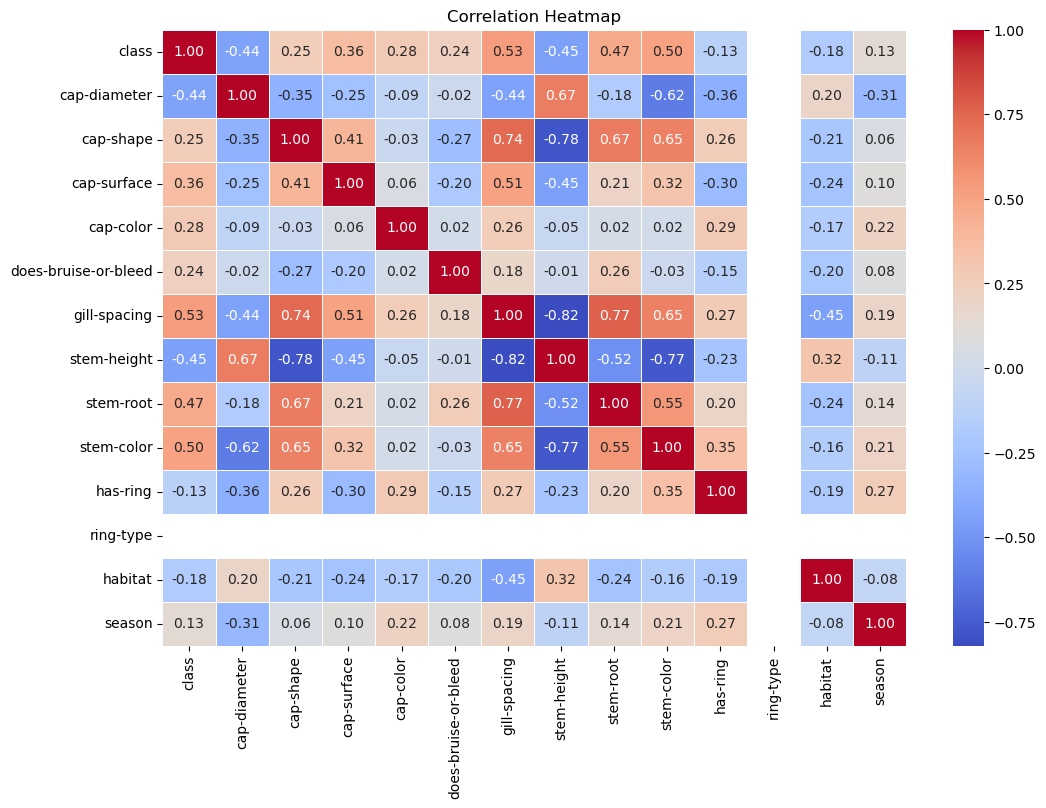

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#calaculation of the correlation matrix
corr = mushr.corr()

#plotting of the actual heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()